<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/PID_Kd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

In [37]:
def func(x1, x2):
  return 0.1*x1**2 + 2*x2**2

In [38]:
def grad_func_x1(x1):
  return 0.2*x1

In [39]:
def grad_func_x2(x2):
  return 4*x2

In [40]:
def PID_Otimizer(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 #parameters
  gamma = 0.9	

  log = [] # lists to store learning process

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  t=0

  while(1):
    t=t+1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    mt_x1 = gamma*prev_mt_x1 + lr*grad_x1
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1
    prev_grad_x1 = grad_x1

    mt_x2 = gamma*prev_mt_x2 + lr*grad_x2
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2
    prev_grad_x2 = grad_x2

    log.append((x1,x2))

    x1_prev = x1
    x2_prev = x2

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1_prev == x1 and x2_prev == x2):
      break

  return x1, x2, log,t

In [41]:
%%time
x1, x2, log1,t = PID_Otimizer(lr=0.01, Kd=4)

CPU times: user 70.4 ms, sys: 5.04 ms, total: 75.4 ms
Wall time: 78.6 ms


In [42]:
print(t)

62654


In [43]:
%%time
x1, x2, log2,t = PID_Otimizer(lr=0.01, Kd=2)

CPU times: user 66.8 ms, sys: 0 ns, total: 66.8 ms
Wall time: 73.7 ms


In [44]:
print(t)

46395


In [45]:
%%time
x1, x2, log4,t = PID_Otimizer(lr=0.01, Kd=0.9)


CPU times: user 43.4 ms, sys: 2.04 ms, total: 45.4 ms
Wall time: 49.1 ms


In [46]:
print(t)

36693


In [47]:
%%time
x1, x2, log5,t = PID_Otimizer(lr=0.01, Kd=0.8)

CPU times: user 66.7 ms, sys: 1.91 ms, total: 68.6 ms
Wall time: 76 ms


In [48]:
print(t)

46629


In [49]:
x1 = np.linspace(-10.0, 10.0, 100)
x2 = np.linspace(-10.0, 10.0, 100)

In [50]:
X1, X2 = np.meshgrid(x1, x2)
Y = costs1 = np.array([func(X1, X2) for X1, X2 in zip(X1, X2)])

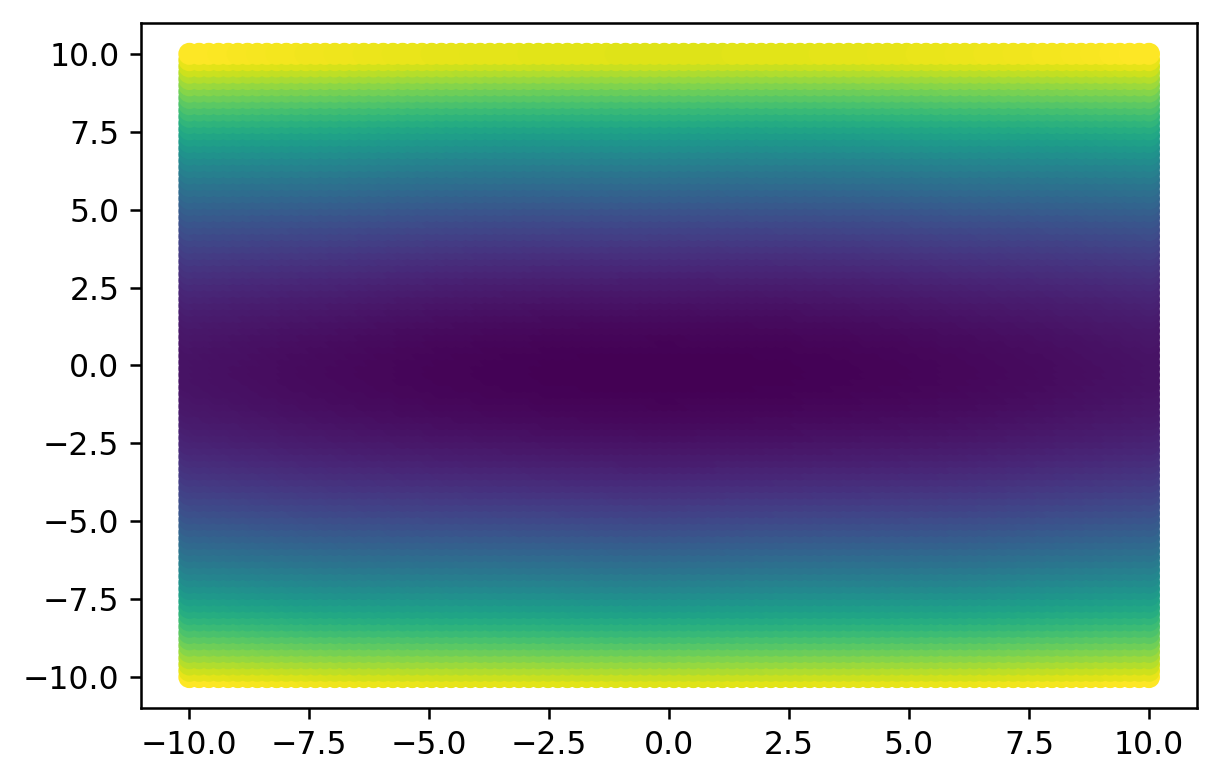

In [51]:
cm = plt.cm.get_cmap('viridis')
plt.scatter(X1, X2, c=Y, cmap=cm)
plt.show()

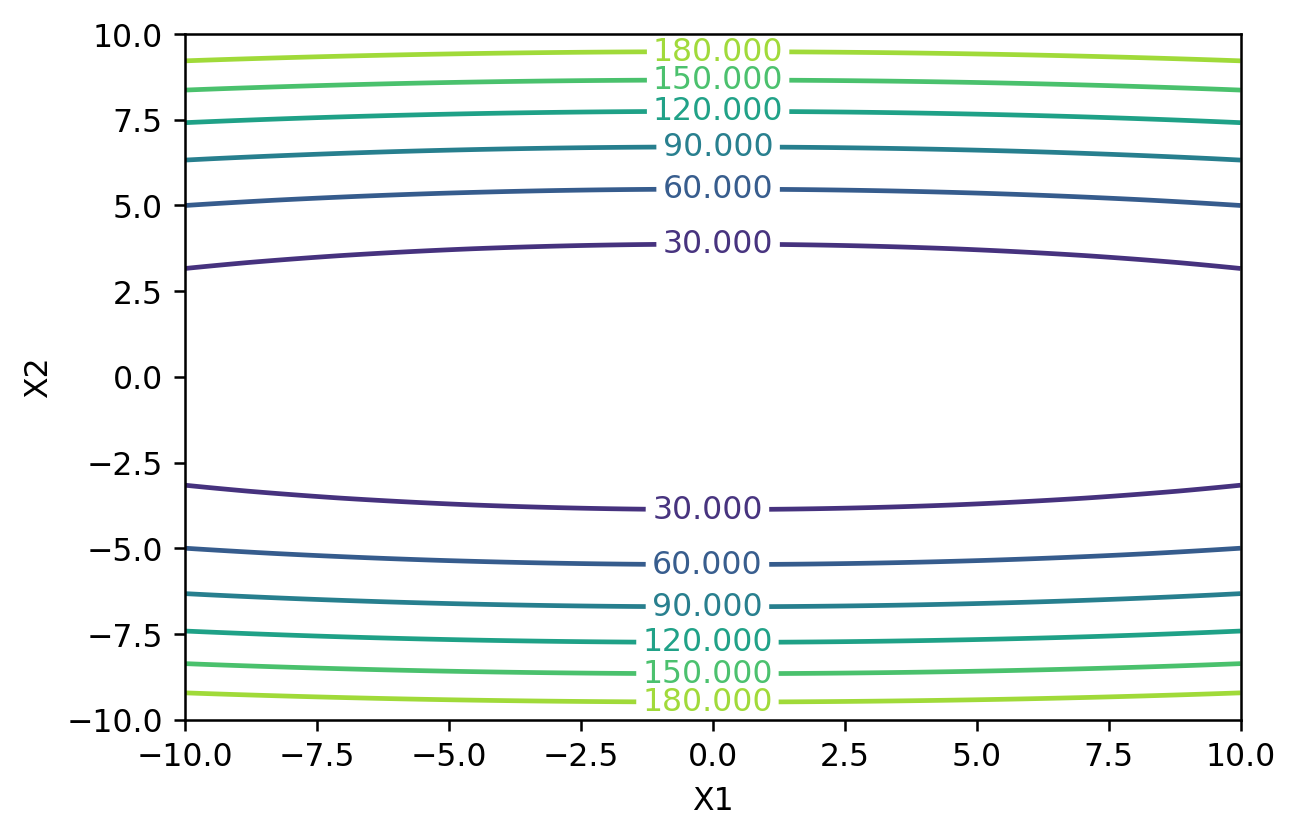

In [52]:
cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

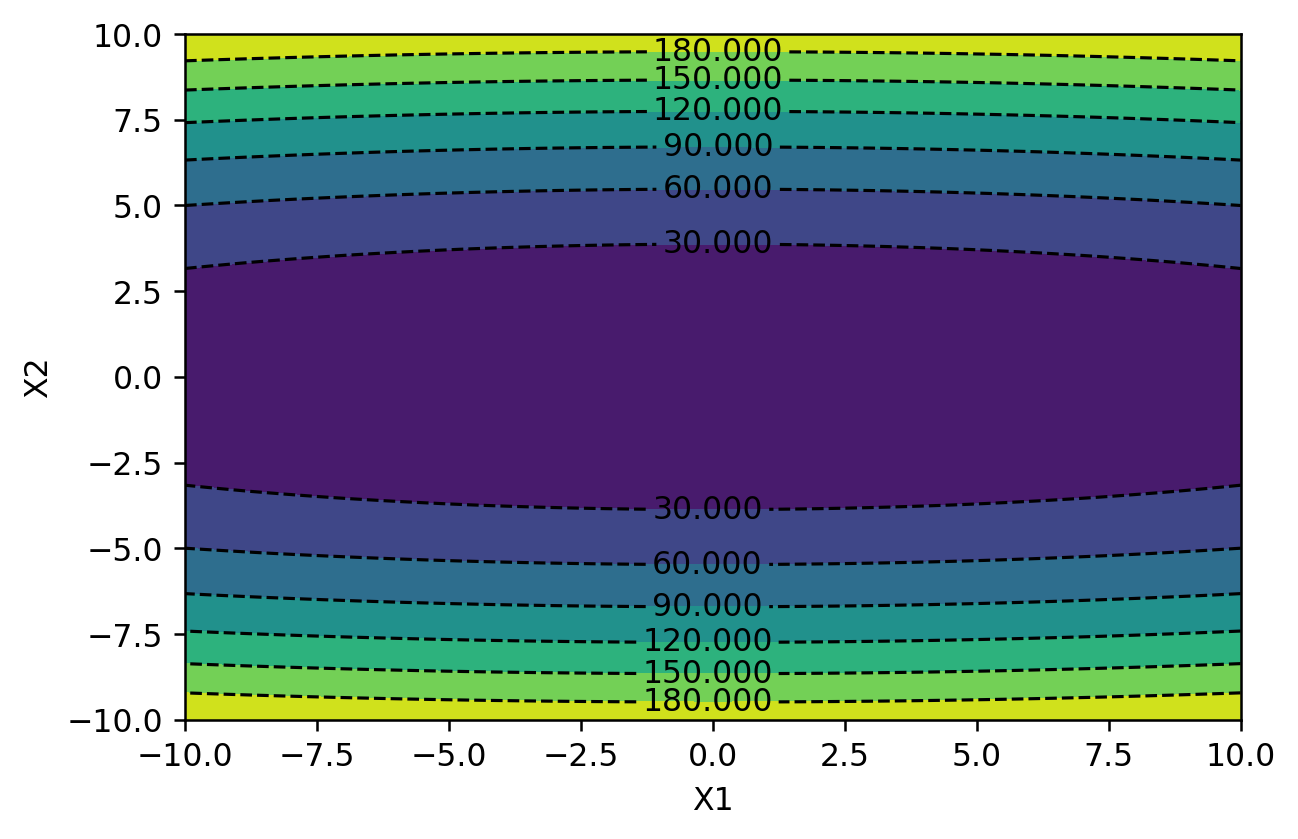

In [53]:
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

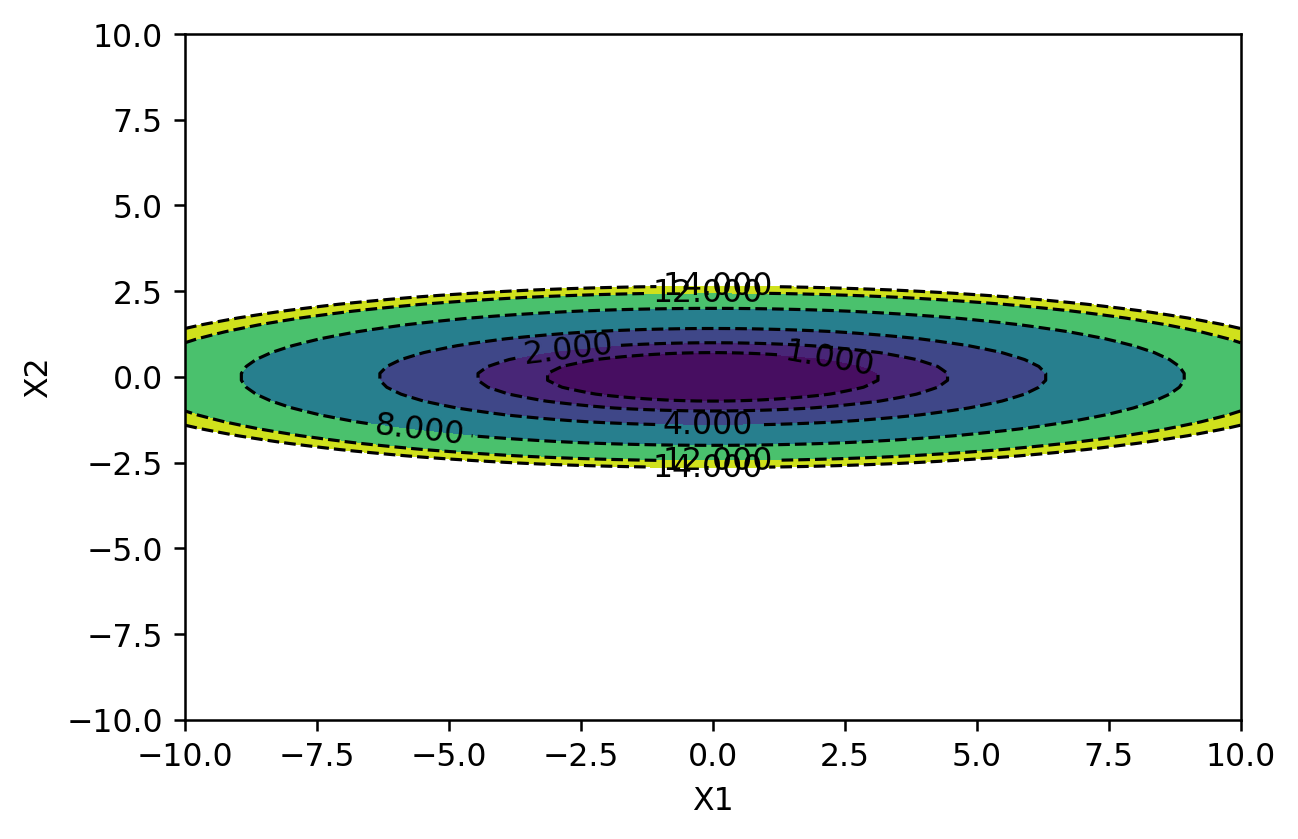

In [54]:
levels = [0.0, 1.0, 2.0, 4.0, 8.0, 12.0, 14.0]
cp = plt.contour(X1, X2, Y, levels, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, levels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

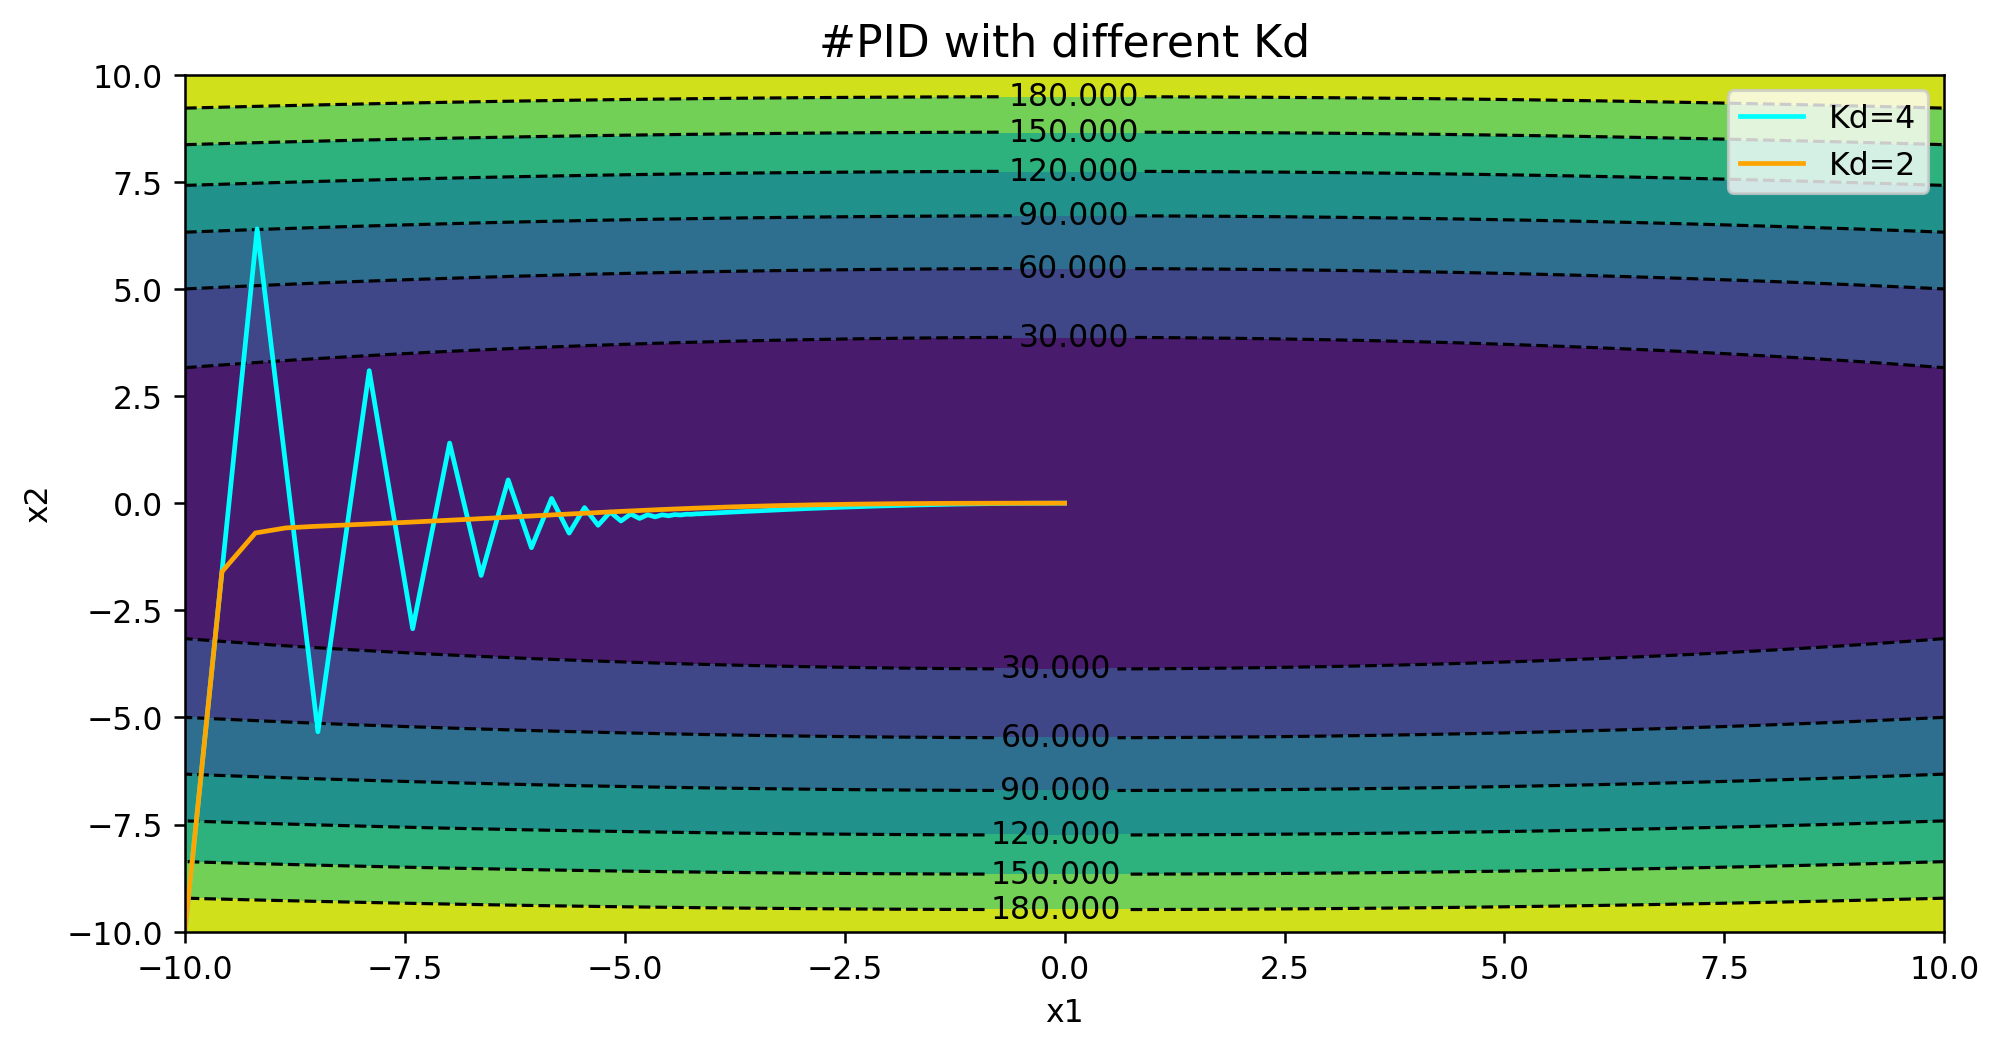

CPU times: user 908 ms, sys: 73.5 ms, total: 981 ms
Wall time: 912 ms


In [55]:
%%time
x_val1 = [l[0] for l in log1]
y_val1 = [l[1] for l in log1]

x_val2 = [l[0] for l in log2]
y_val2 = [l[1] for l in log2]



plt.figure(figsize=(10,5))

cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )

plt.rcParams['figure.dpi'] = 227

plt.title('#PID with different Kd', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val1,y_val1, label='Kd=4',color='cyan')
plt.plot(x_val2,y_val2, label = 'Kd=2', color='orange')

plt.legend()

plt.show()

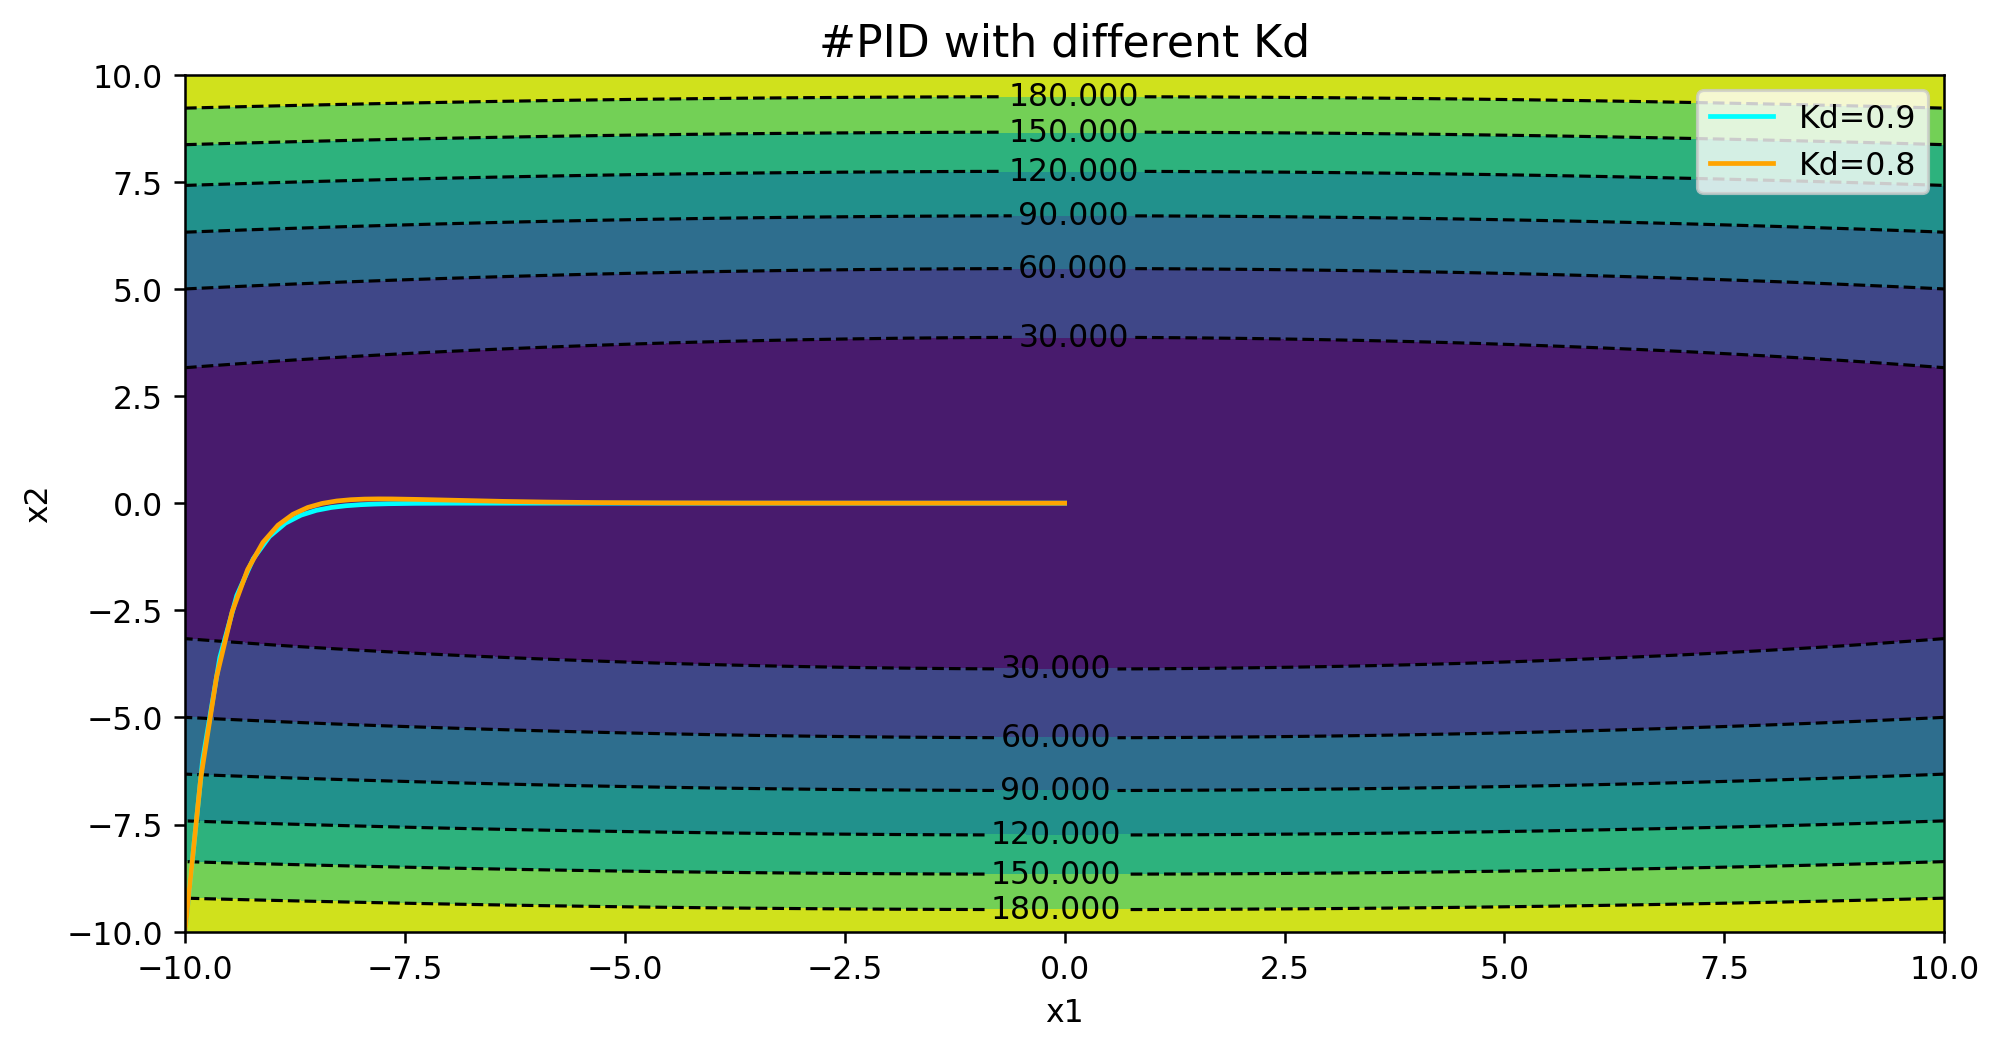

CPU times: user 737 ms, sys: 103 ms, total: 840 ms
Wall time: 731 ms


In [56]:
%%time
x_val4 = [l[0] for l in log4]
y_val4 = [l[1] for l in log4]

x_val5 = [l[0] for l in log5]
y_val5 = [l[1] for l in log5]

plt.figure(figsize=(10,5))
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )

plt.rcParams['figure.dpi'] = 227

plt.title('#PID with different Kd', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')


plt.plot(x_val4,y_val4, label = 'Kd=0.9',color='cyan')
plt.plot(x_val5,y_val5, label = 'Kd=0.8', color='orange')
plt.legend()

plt.show()